<a href="https://colab.research.google.com/github/KMP-Dilanka/uom-2025-ai-session/blob/main/Housing_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [53]:
data=pd.read_csv("Housing.csv")

In [54]:
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [55]:
X = data[["area","bedrooms","stories","mainroad","guestroom","basement",
          "hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]]
y = data["price"]

# Convert categorical variables into numeric (One-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [56]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef)

                            Feature    Coefficient
0                              area     266.968373
1                          bedrooms  269338.122245
2                           stories  577273.328977
3                           parking  326517.571811
4                      mainroad_yes  360053.551789
5                     guestroom_yes  356723.777959
6                      basement_yes  445511.076182
7               hotwaterheating_yes  973789.126336
8               airconditioning_yes  914262.997564
9                      prefarea_yes  625469.097155
10  furnishingstatus_semi-furnished  -69068.931257
11     furnishingstatus_unfurnished -469109.866182


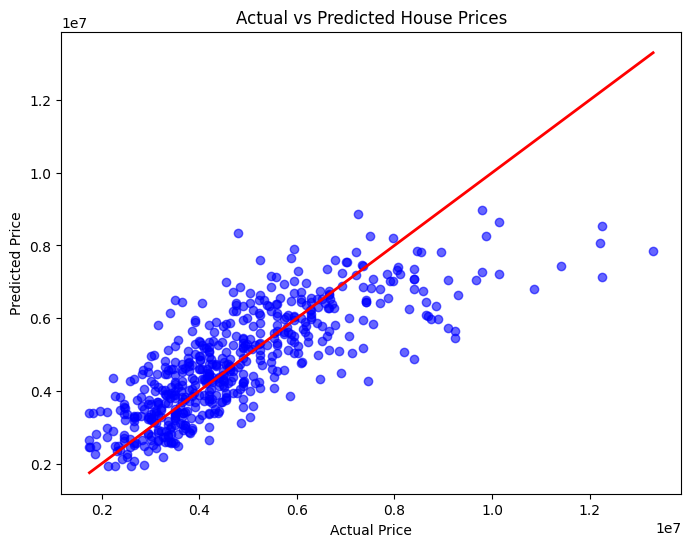

In [57]:
# Predict prices using the model
y_pred = model.predict(X)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # 45° line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [58]:
new_data = pd.DataFrame([{
    "area": 8000,
    "bedrooms": 5,
    "stories": 2,
    "mainroad": "no",
    "guestroom": "yes",
    "basement": "yes",
    "hotwaterheating": "no",
    "airconditioning": "yes",
    "parking": 0,
    "prefarea": "yes",
    "furnishingstatus": "semi-furnished"
}])

# Apply same one-hot encoding
new_data = pd.get_dummies(new_data, drop_first=True)

# Align with training columns (fill missing with 0)
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Predict
prediction = model.predict(new_data)
print("Predicted Price:", prediction[0])

Predicted Price: 5134390.696255552
